In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator

from pathlib import Path
from MITRotor import BEM, IEA10MW, IEA15MW, BEMGeometry, AerodynamicProperties, NoTipLoss, PrandtlTipLoss, ConstantInduction, KraghAerodynamics, ClassicalMomentum, UnifiedMomentum, MadsenMomentum, NoTangentialInduction, DefaultTangentialInduction, BEMSolution

In [2]:
fontsize = 24
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

In [3]:
# casenames = [r's0_v4', r'sn2_v2', r's0_v2',r's2_v2', r'sn4_v0', r'sn2_v0', r's0_v0', r's2_v0', r's4_v0', r'sn2_vn2', r's0_vn2', r's2_vn2', r's0_vn4']
casenames = [r's0_v2']

wrfles_bem = []
for count, name in enumerate(casenames):
    wrfles_bem.append(dict(np.load('/scratch/09909/smata/wrf_les_sweep/runs/irrot/'+casenames[count]+'_new.npz')))


In [21]:
count = 0
rotor = IEA10MW()

# Get radial points
a = ((wrfles_bem[count]['rOverR'] * rotor.R) - rotor.hub_radius)/rotor.R
r = (rotor.hub_radius + a * (rotor.R - rotor.hub_radius)) / rotor.R

# Compute induction
ind = 1 - np.mean(wrfles_bem[count]['u'],axis=0) / 7

phi = np.deg2rad(np.mean(wrfles_bem[count]['phi'], axis=0))
Cl = np.mean(wrfles_bem[count]['cl'], axis=0)
Cd = np.mean(wrfles_bem[count]['cd'], axis=0)

r =  (np.ones_like(Cd.T) * r).T

# Solidity
sigma = rotor.solidity_func(r)

# Relative velocity
W = np.mean(wrfles_bem[count]['vrel'], axis=0) / 7

# Axial coefficient
Cax = Cl * np.cos(phi) + Cd * np.sin(phi)

# Local CT
ct = sigma * W**2 * Cax

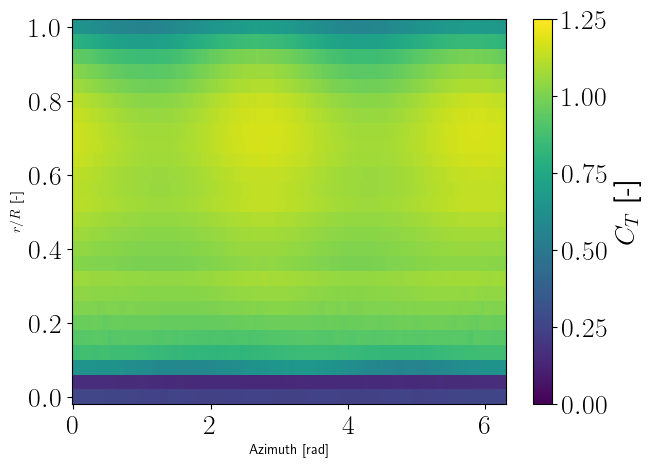

<Figure size 4480x3360 with 0 Axes>

In [25]:
fig, ax = plt.subplots(figsize=(7, 5))

mesh = ax.pcolormesh(np.linspace(0,2*np.pi,158),np.linspace(0,1,26),ct, cmap='viridis',vmin=0,vmax=1.25)
ax.set_xlabel('Azimuth [rad]')
ax.set_ylabel('$r/R$ [-]')
cbar = fig.colorbar(mesh, ax=ax, location='right', shrink=1)
cbar.set_label('$C_T$ [-]',fontsize=20)

plt.figure(dpi=700)
plt.show()

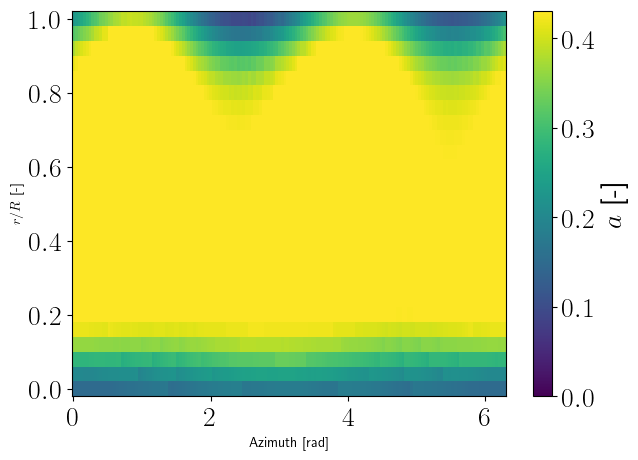

<Figure size 4480x3360 with 0 Axes>

In [24]:
fig, ax = plt.subplots(figsize=(7, 5))

mesh = ax.pcolormesh(np.linspace(0,2*np.pi,158),np.linspace(0,1,26),ind, cmap='viridis',vmin=0,vmax=0.43)
ax.set_xlabel('Azimuth [rad]')
ax.set_ylabel('$r/R$ [-]')
cbar = fig.colorbar(mesh, ax=ax, location='right', shrink=1)
cbar.set_label('$a$ [-]',fontsize=20)

plt.figure(dpi=700)
plt.show()

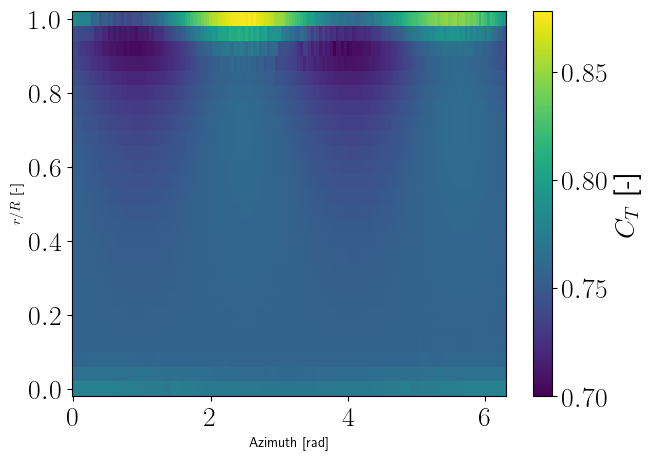

<Figure size 4480x3360 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize=(7, 5))

mesh = ax.pcolormesh(np.linspace(0,2*np.pi,158),np.linspace(0,1,26),np.mean(wrfles_bem[0]['u'],axis=0)/7, cmap='viridis')
ax.set_xlabel('Azimuth [rad]')
ax.set_ylabel('$r/R$ [-]')
cbar = fig.colorbar(mesh, ax=ax, location='right', shrink=1)
cbar.set_label('$C_T$ [-]',fontsize=20)

plt.figure(dpi=700)
plt.show()

/tmp/ipykernel_3066568/3409462822.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  mesh = ax.pcolormesh(X,Y,np.mean(wrfles_bem[0]['v'],axis=0).T/7, cmap='viridis')


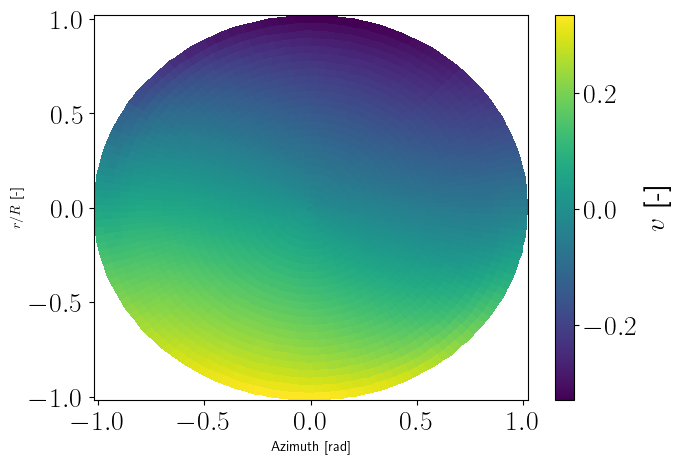

<Figure size 4480x3360 with 0 Axes>

In [47]:
t = np.linspace(0,2*np.pi,158)
t = (t + 1/4 * np.pi) % (2 * np.pi)
r = np.linspace(0,1,26)

R, T = np.meshgrid(r, t)

# X = R * np.sin(T)
# Y = R * np.cos(T)

X = R * np.cos(T)
Y = R * np.sin(T)

fig, ax = plt.subplots(figsize=(7, 5))

mesh = ax.pcolormesh(X,Y,np.mean(wrfles_bem[0]['v'],axis=0).T/7, cmap='viridis')
ax.set_xlabel('Azimuth [rad]')
ax.set_ylabel('$r/R$ [-]')
cbar = fig.colorbar(mesh, ax=ax, location='right', shrink=1)
cbar.set_label('$v$ [-]',fontsize=20)
# ax.invert_xaxis()

plt.figure(dpi=700)
plt.show()

In [9]:
wrfles_bem[0].keys()

dict_keys(['diameter', 'hub_height', 'rOverR', 'dx', 'dy', 'dt', 'rho', 'Nx', 'Ny', 'Nz', 'tower_xloc', 'tower_yloc', 'uinf', 'omega', 'thrust', 'power_aero', 'power_mech', 'power_gen', 'torque_aero', 'ct', 'cp', 'v0', 'f', 'fn', 'ft', 'l', 'd', 'cl', 'cd', 'aoa', 'v1', 'u', 'v', 'w', 'vrel', 'phi', 'bpx', 'bpy', 'bpz'])

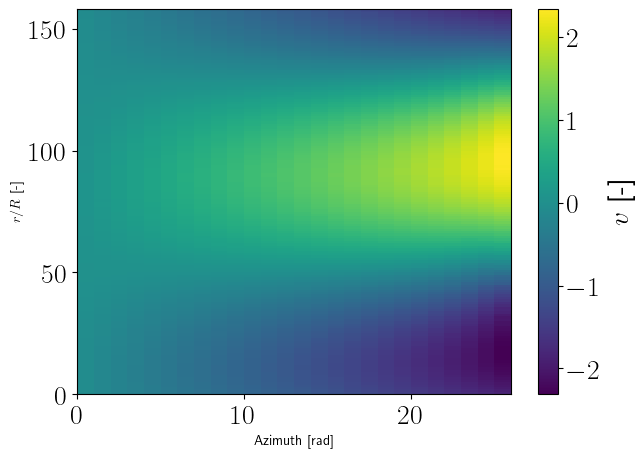

<Figure size 4480x3360 with 0 Axes>

In [40]:
fig, ax = plt.subplots(figsize=(7, 5))

mesh = ax.pcolormesh(np.mean(wrfles_bem[0]['v'],axis=0).T, cmap='viridis')
ax.set_xlabel('Azimuth [rad]')
ax.set_ylabel('$r/R$ [-]')
cbar = fig.colorbar(mesh, ax=ax, location='right', shrink=1)
cbar.set_label('$v$ [-]',fontsize=20)
# ax.invert_xaxis()

plt.figure(dpi=700)
plt.show()